STEP 1: Loading Dataset...
Data Loaded. Rows: 30162 (Dropped 2399 rows with missing data)

STEP 2: Generating 'Before Scaling' Visualizations...


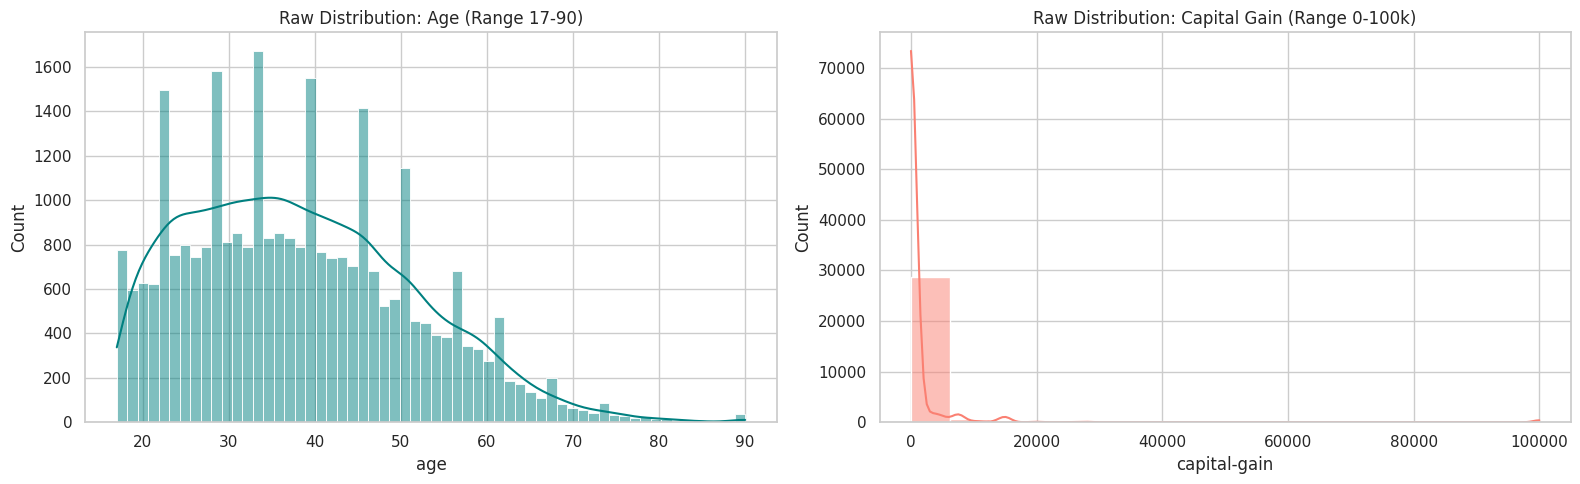


STEP 3: Applying Feature Encoding...
 - Label Encoded 'sex': ['Female' 'Male'] -> [0, 1]
 - Label Encoded 'income': ['<=50K' '>50K'] -> [0, 1]
 - One-Hot Encoding Applied. Total Features: 97

STEP 4: Applying StandardScaler...
 - Scaling Complete. Mean approx 0, Std Dev approx 1.

STEP 5: Generating 'After Scaling' Visualizations...


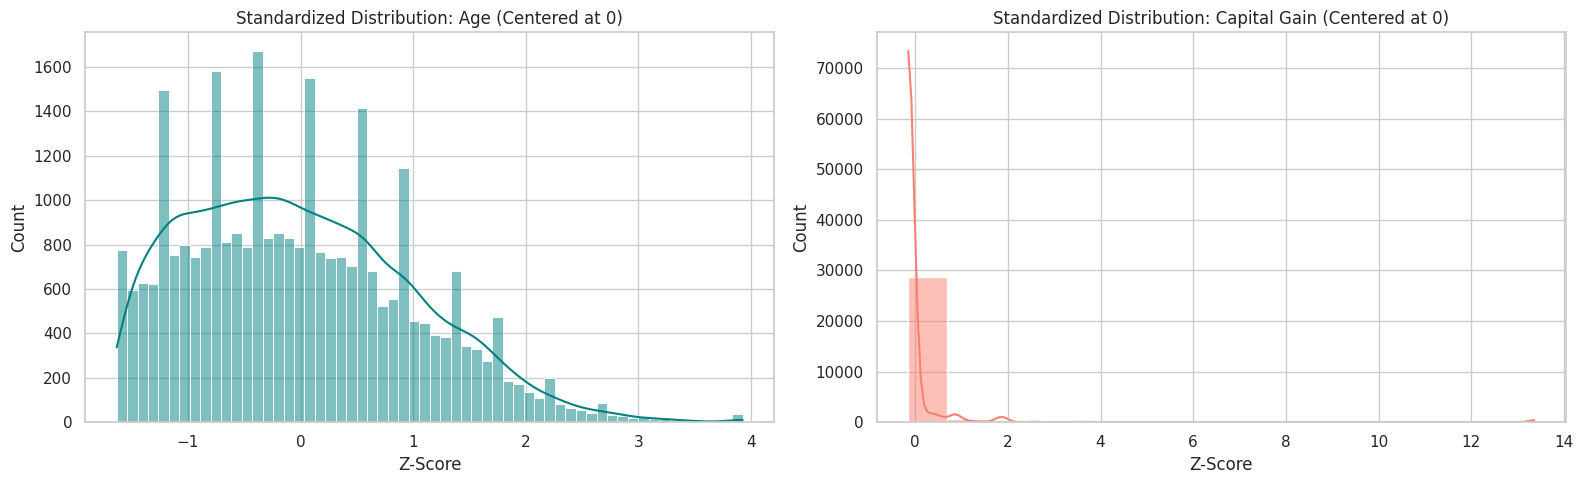


SUCCESS: Pipeline Finished. Data saved to adult_income_processed_advanced.csv


In [3]:

# Adult Income Dataset Preprocessing Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# SETTING UP VISUALIZATION AESTHETICS
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (14, 10)

def load_data():
    # Loading dataset directly from UCI Repository
    # Handling typical issues: messy whitespace and '?' for missing values
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
    cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
            'marital-status', 'occupation', 'relationship', 'race', 'sex',
            'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

    print("STEP 1: Loading Dataset...")
    df = pd.read_csv(url, names=cols, na_values='?', skipinitialspace=True)

    # Cleaning: Dropping rows with missing values to ensure data quality
    original_len = len(df)
    df.dropna(inplace=True)
    print(f"Data Loaded. Rows: {len(df)} (Dropped {original_len - len(df)} rows with missing data)")
    return df

def visualize_before_scaling(df):
    # Visualizing the raw distribution of numerical data
    # This helps identify why scaling is necessary (ranges are vastly different)
    print("\nSTEP 2: Generating 'Before Scaling' Visualizations...")

    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    # Plot 1: Age Distribution
    sns.histplot(df['age'], kde=True, color='teal', ax=axes[0])
    axes[0].set_title('Raw Distribution: Age (Range 17-90)')

    # Plot 2: Capital Gain Distribution
    # Note: Capital gain has huge outliers and a massive range (0 to 99,999)
    sns.histplot(df['capital-gain'], kde=True, color='salmon', ax=axes[1])
    axes[1].set_title('Raw Distribution: Capital Gain (Range 0-100k)')

    plt.tight_layout()
    plt.show()

def encode_features(df):
    print("\nSTEP 3: Applying Feature Encoding...")
    df_encoded = df.copy()

    # STRATEGY 1: Label Encoding
    # Applied to Binary/Ordinal variables where order matters or just two classes exist
    le = LabelEncoder()
    binary_cols = ['sex', 'income']

    for col in binary_cols:
        df_encoded[col] = le.fit_transform(df[col])
        print(f" - Label Encoded '{col}': {le.classes_} -> [0, 1]")

    # STRATEGY 2: One-Hot Encoding
    # Applied to Nominal variables (Workclass, Occupation, etc.)
    # drop_first=True prevents multicollinearity (Dummy Variable Trap)
    categorical_cols = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'native-country']

    df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)
    print(f" - One-Hot Encoding Applied. Total Features: {df_encoded.shape[1]}")

    return df_encoded

def scale_features(df):
    print("\nSTEP 4: Applying StandardScaler...")
    scaler = StandardScaler()

    # Identifying numerical columns that require scaling
    # We exclude the target 'income' and the binary 'sex'
    num_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

    # Standardizing: z = (x - u) / s
    # This centers the mean to 0 and variance to 1
    df[num_cols] = scaler.fit_transform(df[num_cols])

    print(" - Scaling Complete. Mean approx 0, Std Dev approx 1.")
    return df

def visualize_after_scaling(df):
    print("\nSTEP 5: Generating 'After Scaling' Visualizations...")

    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    # Plot 1: Scaled Age
    sns.histplot(df['age'], kde=True, color='teal', ax=axes[0])
    axes[0].set_title('Standardized Distribution: Age (Centered at 0)')
    axes[0].set_xlabel('Z-Score')

    # Plot 2: Scaled Capital Gain
    sns.histplot(df['capital-gain'], kde=True, color='salmon', ax=axes[1])
    axes[1].set_title('Standardized Distribution: Capital Gain (Centered at 0)')
    axes[1].set_xlabel('Z-Score')

    plt.tight_layout()
    plt.show()

# MAIN EXECUTION FLOW
if __name__ == "__main__":
    # 1. Load
    dataset = load_data()

    # 2. Visualize Raw
    visualize_before_scaling(dataset)

    # 3. Encode
    dataset_encoded = encode_features(dataset)

    # 4. Scale
    dataset_final = scale_features(dataset_encoded)

    # 5. Visualize Scaled
    visualize_after_scaling(dataset_final)

    # 6. Save
    output_file = "adult_income_processed_advanced.csv"
    dataset_final.to_csv(output_file, index=False)
    print(f"\nSUCCESS: Pipeline Finished. Data saved to {output_file}")